In [0]:

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten

import time

In [0]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


0


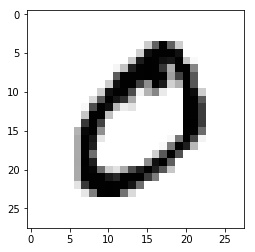

3


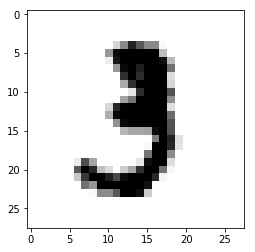

4


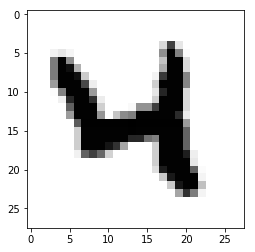

3


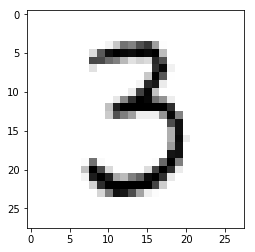

In [0]:
for i in [1,10,20,50]:
  print(raw_train_y[i])
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.show()

In [0]:
print(np.max(raw_train_x))
print(np.max(raw_train_y))
print(raw_train_x[0])

train_x = raw_train_x / 255
test_x = raw_test_x /255

train_y = raw_train_y
test_y = raw_test_y


255
9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 

In [0]:
train_x = train_x.reshape((60000,28*28))
test_x = test_x.reshape((10000,28*28))

print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


In [0]:
model = keras.Sequential()
# model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='relu'))
# model.add(Dense(3, activation="softmax"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=128)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
60000/60000 [==============================] - 1s 20us/sample - loss: 2.0762 - acc: 0.2613
Epoch 2/100
60000/60000 [==============================] - 1s 20us/sample - loss: 1.2628 - acc: 0.6193
Epoch 3/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.7393 - acc: 0.7926
Epoch 4/100
60000/60000 [==============================] - 1s 20us/sample

(10000, 10)
[1.1588650e-04 8.7778899e-05 2.7769133e-03 9.5209392e-04 3.3289940e-08
 1.7881715e-05 4.3176915e-10 9.9585754e-01 5.5175847e-06 1.8631772e-04]
[7 2 1 0 4 1 4 9 6 9]
7


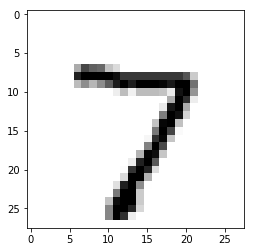

2


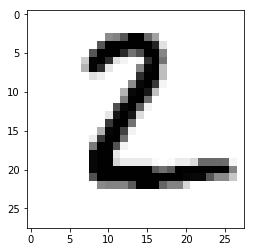

1


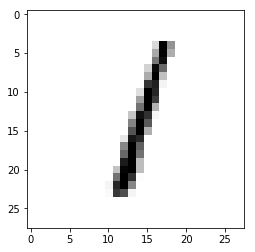

0


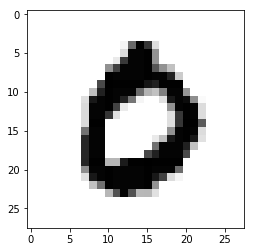

In [0]:
y_ = model.predict(test_x)
print(y_.shape)
print(y_[0])

predicted = np.argmax(y_, axis=1)
print(predicted[:10])

for i in range(4):
  print(predicted[i])
  plt.imshow(raw_test_x[i], cmap=plt.cm.binary)
  plt.show()
  

In [0]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

# data_count = train_x.shape[0]
# data_size = train_x.shape[1]*train_x.shape[2]
# train_x = train_x.reshape((data_count, data_size))

# data_count = test_x.shape[0]
# test_x = test_x.reshape((data_count, data_size))

In [0]:
from tensorflow.keras.layers import Flatten # ADD

model = keras.Sequential()
model.add(Flatten(input_shape=(28,28))) # ADD
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 22us/sample - loss: 0.8173 - acc: 0.7608
Epoch 2/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3772 - acc: 0.8924
Epoch 3/5
60000/60000 [=========================